In [52]:
from scipy.io import loadmat
import pickle
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

from dstft import DSTFT, FDSTFT, entropy_loss, fast_sst, frequency_tracking

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(1802)
device

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'cuda'

In [53]:
mat = loadmat('../data/fan_flutter.mat')['x']
x = torch.from_numpy(mat).float().to(device)[:, 4_000:10_000]

In [54]:
stride = 50
support = 1_000
epochs = 100_000
lr = 100
win_min = 100
threshold = 1
patience = 99
vmin = -15
vmax = 0
win_length = 600;

In [55]:
# specs = {}
# stfts = {}
# wins = {}
# losses = {}
# f_hats = {}
# ss = {}
# losses2 = {}
# f_hats2 = {}
# mse = {}
# mse2 = {}

# with open("../tmp/2_specs.pkl", "wb") as file: pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)
# with open("../tmp/2_stfts.pkl", "wb") as file: pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)
# with open("../tmp/2_wins.pkl", "wb") as file: pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)
# with open("../tmp/2_losses.pkl", "wb") as file: pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)
# with open("../tmp/2_f_hats.pkl", "wb") as file: pickle.dump(f_hats, file, pickle.HIGHEST_PROTOCOL)
# with open("../tmp/2_ss.pkl", "wb") as file: pickle.dump(ss, file, pickle.HIGHEST_PROTOCOL)
# with open("../tmp/2_losses2.pkl", "wb") as file: pickle.dump(losses2, file, pickle.HIGHEST_PROTOCOL)
# with open("../tmp/2_f_hats2.pkl", "wb") as file: pickle.dump(f_hats2, file, pickle.HIGHEST_PROTOCOL)
# with open("../tmp/2_mse.pkl", "wb") as file: pickle.dump(mse, file, pickle.HIGHEST_PROTOCOL)
# with open("../tmp/2_mse2.pkl", "wb") as file: pickle.dump(mse2, file, pickle.HIGHEST_PROTOCOL)

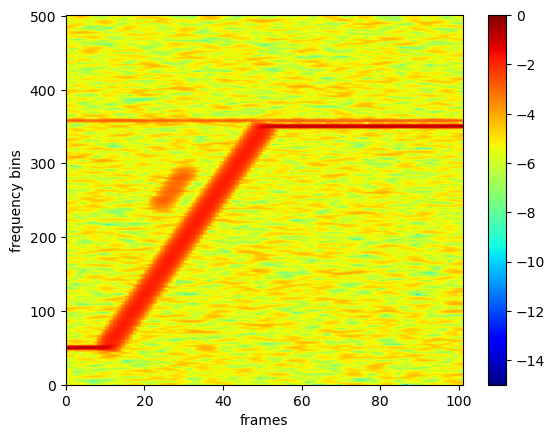

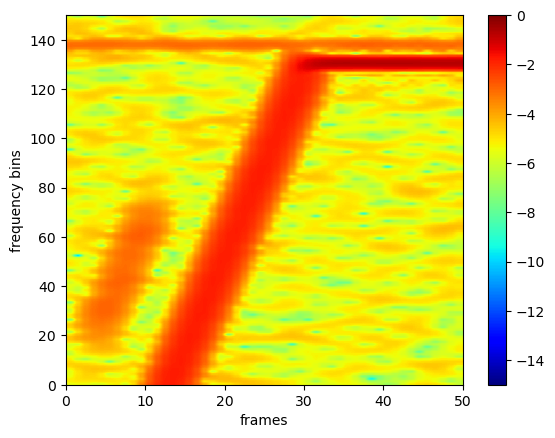

In [56]:
dstft = FDSTFT(
    x,
    win_length=500,
    support=support,
    stride=stride,
    win_requires_grad=False,
    stride_requires_grad=False,
    win_p=None,
    stride_p=None,
)
spec, stft = dstft(x)
dstft.print(spec, weights=False, wins=False, bar=True, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

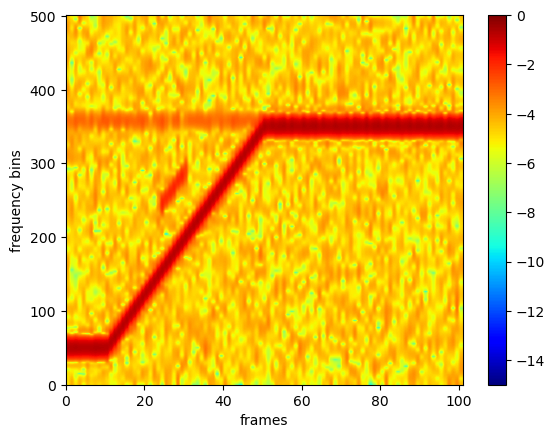

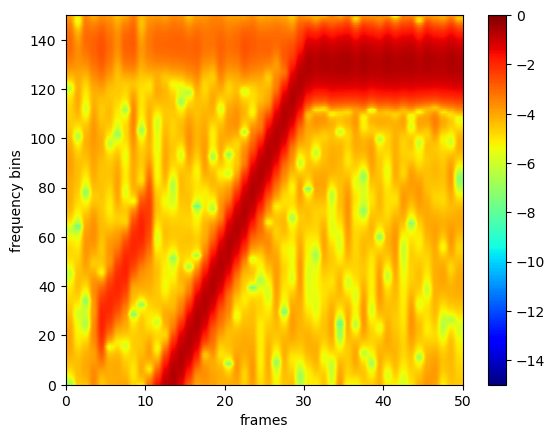

In [57]:
dstft = FDSTFT(
    x,
    win_length=100,
    support=support,
    stride=stride,
    win_requires_grad=False,
    stride_requires_grad=False,
    win_p=None,
    stride_p=None,
)
spec, stft = dstft(x)
dstft.print(spec, weights=False, wins=False, bar=True, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['100'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['100'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['100'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['100'] = entropy_loss(spec).cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

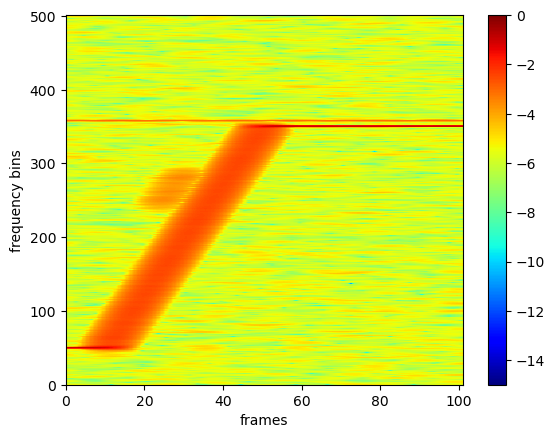

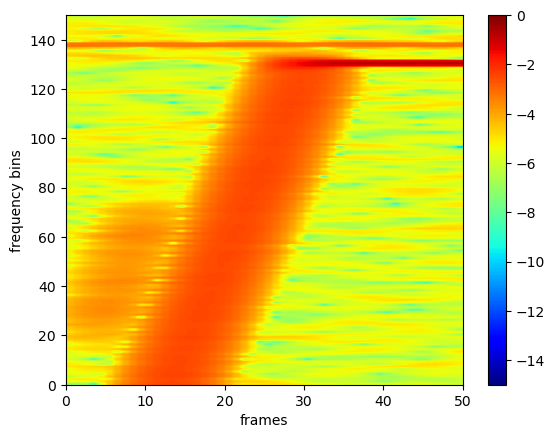

In [58]:
dstft = FDSTFT(
    x,
    win_length=1_000,
    support=support,
    stride=stride,
    win_requires_grad=False,
    stride_requires_grad=False,
    win_p=None,
    stride_p=None,
)
spec, stft = dstft(x)
dstft.print(spec, weights=False, wins=False, bar=True, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)


with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['1000'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['1000'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['1000'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['1000'] = entropy_loss(spec).cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

Single window length

Epoch 00109: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00209: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00309: reducing learning rate of group 0 to 1.0000e-01.
308 236.0


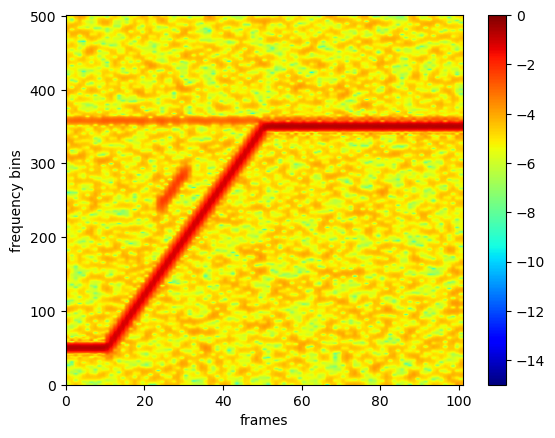

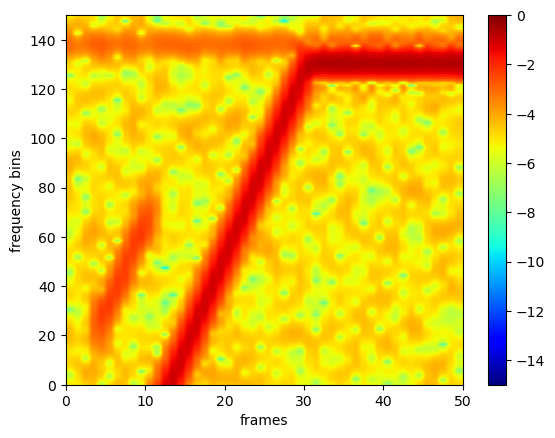

In [59]:
dstft = FDSTFT(
    x,
    win_length=win_length,
    support=support,
    stride=stride,
    win_requires_grad=True,
    stride_requires_grad=False,
    win_p=None,
    stride_p=None,
)
params = [{'params': dstft.win_length, 'lr': lr}]
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=opt, mode='min', factor=0.1, patience=patience, verbose=True
)

min_err = 100
min_win = 0

for epoch in range(epochs):
    opt.zero_grad()
    spec, stft = dstft(x)
    err = entropy_loss(spec)
    err.backward()
    opt.step()
    sch.step(err)

    if err < min_err:
        min_err = err
        min_win = dstft.win_length.item()

    if opt.param_groups[0]['lr'] < threshold:
        break

print(epoch, f'{dstft.win_length.item():.1f}')
dstft.print(spec, x, bar=True, wins=False, weights=False, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['$\\theta$'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['$\\theta$'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['$\\theta$'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['$\\theta$'] = entropy_loss(spec).detach().cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

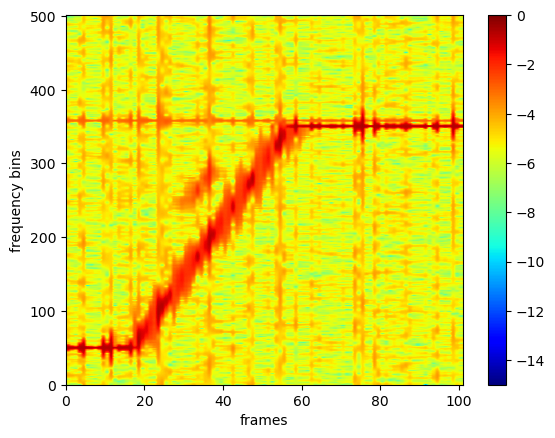

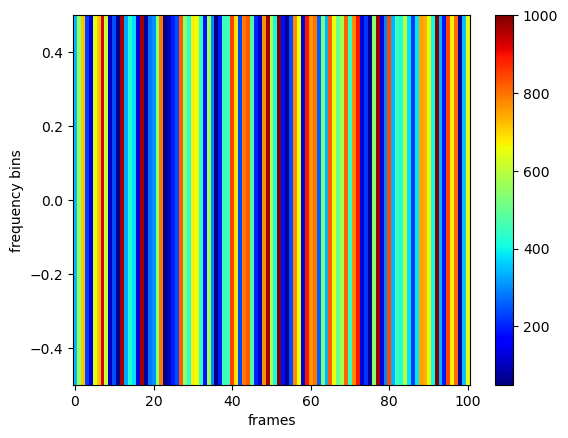

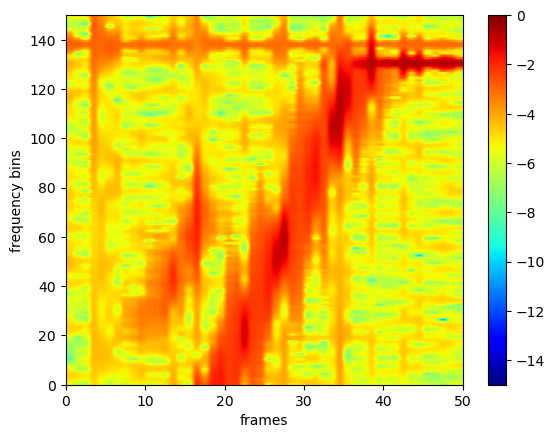

In [60]:
dstft = FDSTFT(
    x,
    win_length=500,
    support=support,
    stride=stride,
    win_requires_grad=False,
    stride_requires_grad=False,
    win_p='t',
    stride_p=None,
    first_frame=True,
)
dstft.win_length.data = dstft.win_min + (
    dstft.win_max - dstft.win_min
) * torch.rand(dstft.win_length.size(), device=device)
spec, stft = dstft(x)
dstft.print(spec, x, weights=True, bar=True, wins=False, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['$\mathcal{R}_t$'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['$\mathcal{R}_t$'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['$\mathcal{R}_t$'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['$\mathcal{R}_t$'] = entropy_loss(spec).detach().cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

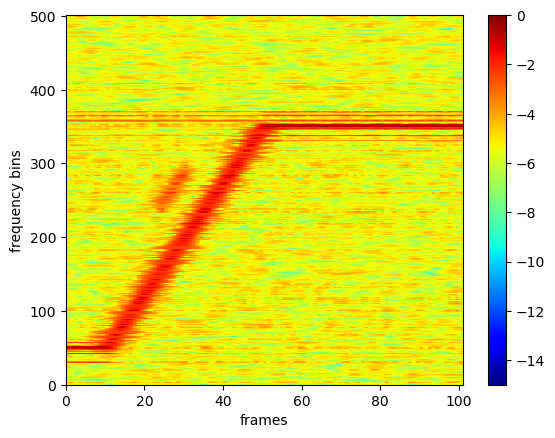

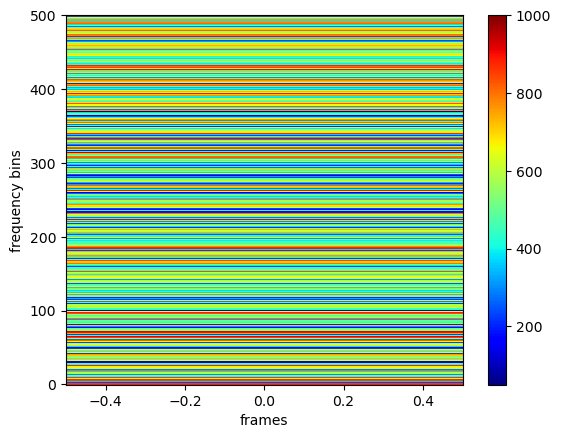

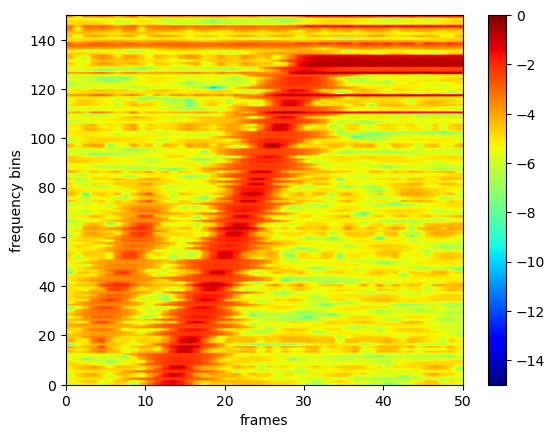

In [61]:
dstft = DSTFT(
    x,
    win_length=500,
    support=support,
    stride=stride,
    win_requires_grad=False,
    stride_requires_grad=False,
    win_p='f',
    stride_p=None,
    first_frame=True,
)
dstft.win_length.data = dstft.win_min + (
    dstft.win_max - dstft.win_min
) * torch.rand(dstft.win_length.size(), device=device)
spec, stft = dstft(x)
dstft.print(spec, x, weights=True, bar=True, wins=False, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['$\mathcal{R}_f$'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['$\mathcal{R}_f$'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['$\mathcal{R}_f$'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['$\mathcal{R}_f$'] = entropy_loss(spec).detach().cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

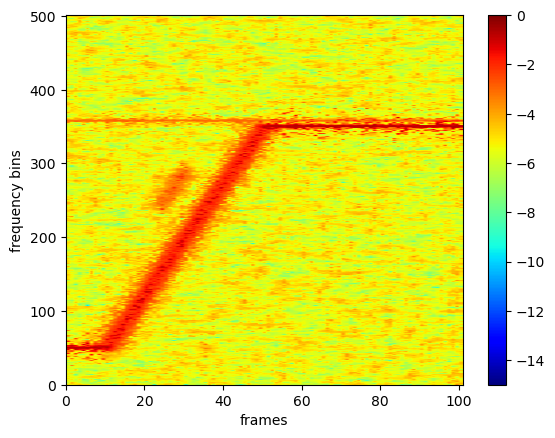

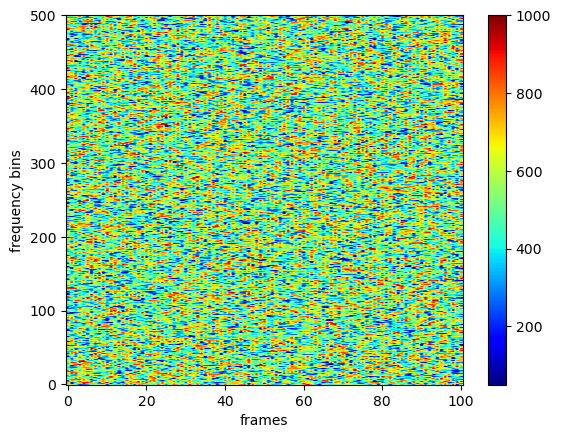

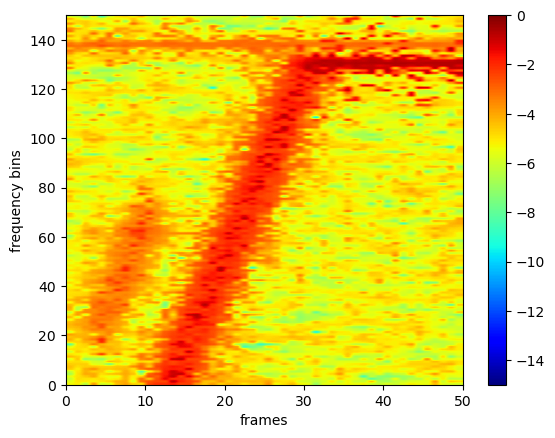

In [62]:
dstft = DSTFT(
    x,
    win_length=500,
    support=support,
    stride=stride,
    win_requires_grad=False,
    stride_requires_grad=False,
    win_p='tf',
    stride_p=None,
    first_frame=True,
)
dstft.win_length.data = dstft.win_min + (
    dstft.win_max - dstft.win_min
) * torch.rand(dstft.win_length.size(), device=device)
spec, stft = dstft(x)
dstft.print(spec, x, weights=True, bar=True, wins=False, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['$\mathcal{R}_{tf}$'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['$\mathcal{R}_{tf}$'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['$\mathcal{R}_{tf}$'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['$\mathcal{R}_{tf}$'] = entropy_loss(spec).detach().cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

Time-varying window length

Epoch 00144: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00244: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00344: reducing learning rate of group 0 to 1.0000e-01.
343


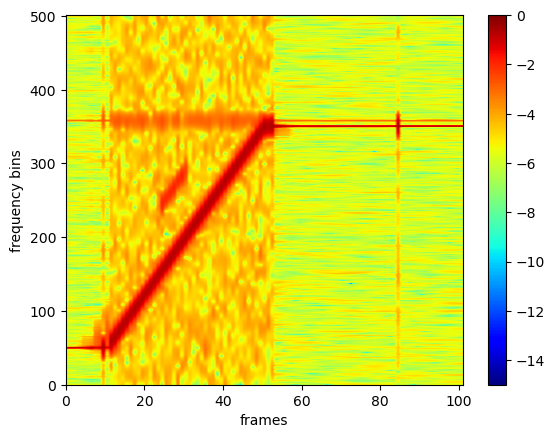

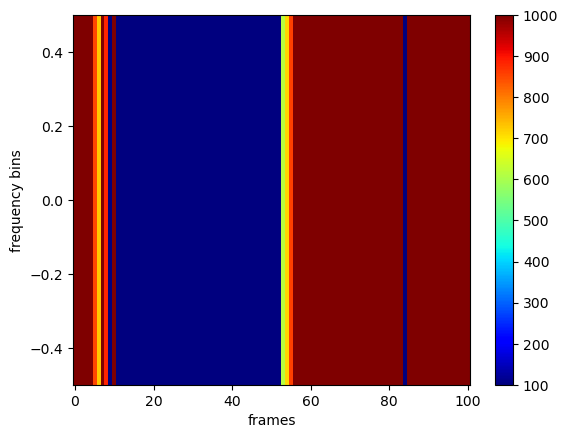

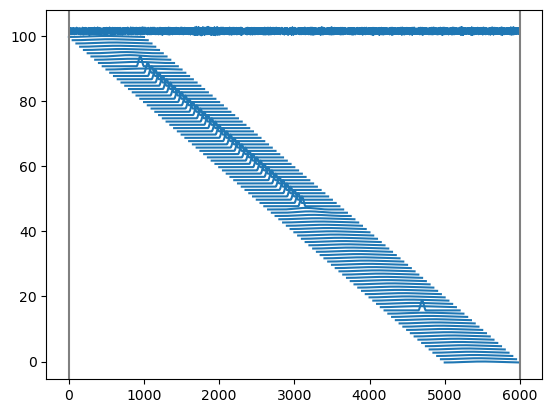

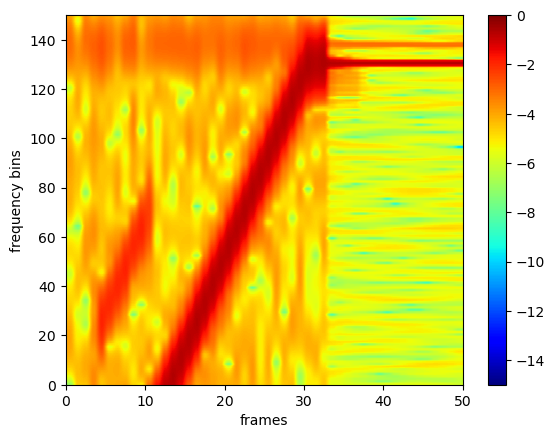

In [63]:
dstft = FDSTFT(
    x,
    win_length=win_length,
    support=support,
    stride=stride,
    win_requires_grad=True,
    stride_requires_grad=False,
    win_p='t',
    win_min=win_min,
)
params = [{'params': dstft.win_length, 'lr': lr}]
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=opt, mode='min', factor=0.1, patience=patience, verbose=True
)

for epoch in range(epochs):
    opt.zero_grad()
    spec, stft = dstft(x)
    err = entropy_loss(spec)
    err.backward()
    opt.step()
    sch.step(err)

    if opt.param_groups[0]['lr'] < threshold:
        break

print(epoch)
dstft.print(spec, x, bar=True, wins=True, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['$\\theta_t$'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['$\\theta_t$'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['$\\theta_t$'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['$\\theta_t$'] = entropy_loss(spec).detach().cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

Epoch 00134: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00234: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00334: reducing learning rate of group 0 to 1.0000e-01.
333


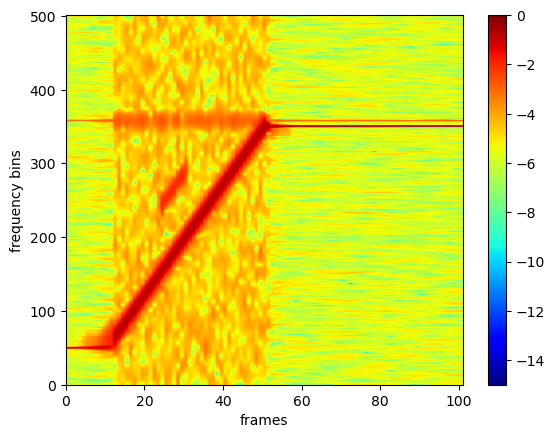

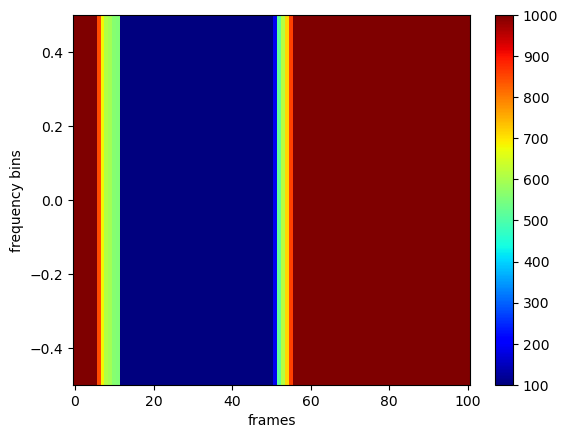

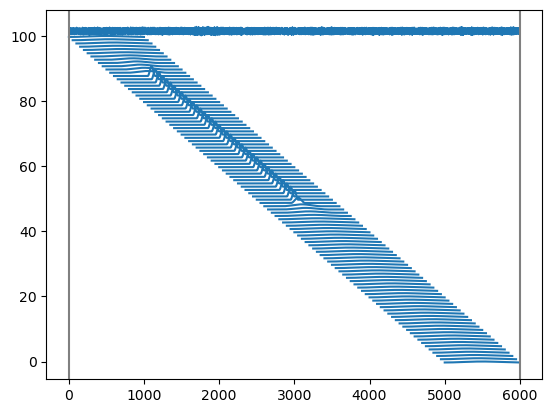

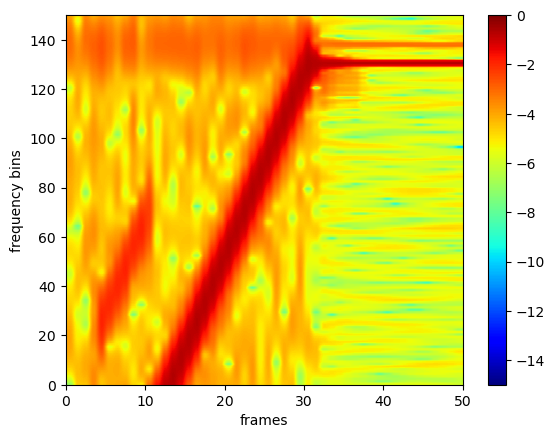

In [64]:
dstft = FDSTFT(
    x,
    win_length=win_length,
    support=support,
    stride=stride,
    win_requires_grad=True,
    stride_requires_grad=False,
    win_p='t',
    win_min=win_min,
)
params = [{'params': dstft.win_length, 'lr': lr}]
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=opt, mode='min', factor=0.1, patience=patience, verbose=True
)

for epoch in range(epochs):
    opt.zero_grad()
    spec, stft = dstft(x)
    err = (
        entropy_loss(spec)
        + 0.001
        * (
            dstft.actual_win_length.diff(dim=1).pow(2)
            + torch.finfo(x.dtype).eps
        )
        .sqrt()
        .mean()
    )
    err.backward()
    opt.step()
    sch.step(err)

    if opt.param_groups[0]['lr'] < threshold:
        break

print(epoch)
dstft.print(spec, x, bar=True, wins=True, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['$\\tilde{\\theta}_t$'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['$\\tilde{\\theta}_t$'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['$\\tilde{\\theta}_t$'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['$\\tilde{\\theta}_t$'] = entropy_loss(spec).detach().cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

Frequency-varying window length

In [65]:
dstft = DSTFT(
    x,
    win_length=win_length,
    support=support,
    stride=stride,
    win_requires_grad=True,
    stride_requires_grad=False,
    win_p='f',
    win_min=win_min,
)
params = [{'params': dstft.win_length, 'lr': lr}]
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=opt, mode='min', factor=0.1, patience=patience, verbose=True
)

for epoch in range(epochs):
    opt.zero_grad()
    spec, stft = dstft(x)
    err = entropy_loss(spec)
    err.backward()
    opt.step()
    sch.step(err)

    if opt.param_groups[0]['lr'] < threshold:
        break

print(epoch)
dstft.print(spec, x, wins=False, bar=True, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['$\\theta_f$'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['$\\theta_f$'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['$\\theta_f$'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['$\\theta_f$'] = entropy_loss(spec).detach().cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

Epoch 00306: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00464: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00621: reducing learning rate of group 0 to 1.0000e-01.
620


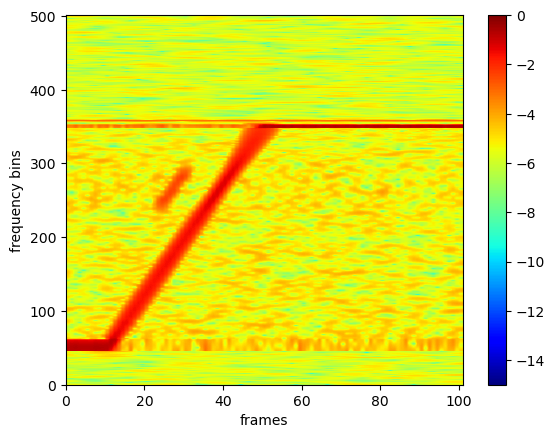

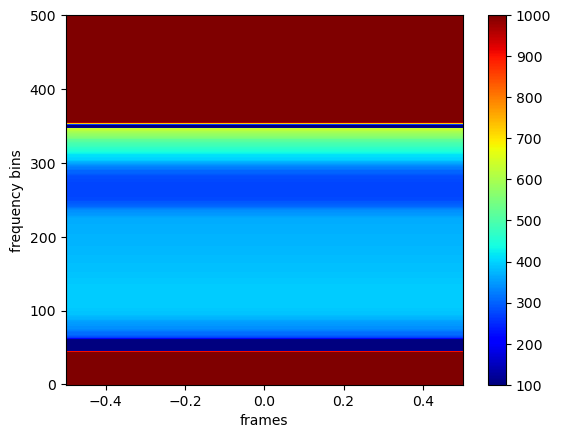

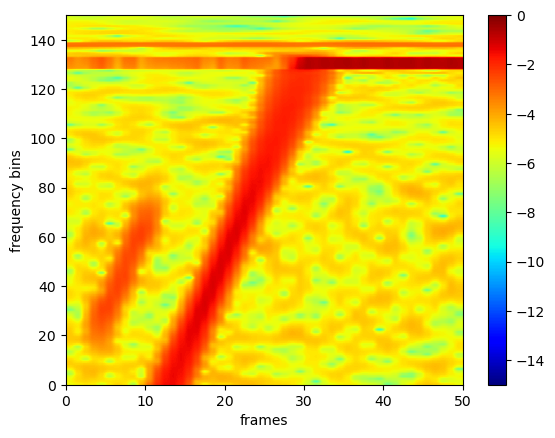

In [ ]:
dstft = DSTFT(
    x,
    win_length=win_length,
    support=support,
    stride=stride,
    win_requires_grad=True,
    stride_requires_grad=False,
    win_p='f',
    win_min=win_min,
)
params = [{'params': dstft.win_length, 'lr': lr}]
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=opt, mode='min', factor=0.1, patience=patience, verbose=True
)

for epoch in range(epochs):
    opt.zero_grad()
    spec, stft = dstft(x)
    err = (
        entropy_loss(spec)
        + 0.01
        * (
            dstft.actual_win_length.diff(dim=0).pow(2)
            + torch.finfo(x.dtype).eps
        )
        .sqrt()
        .mean()
    )
    err.backward()
    opt.step()
    sch.step(err)

    if opt.param_groups[0]['lr'] < threshold:
        break

print(epoch)
dstft.print(spec, x, wins=False, bar=True, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['$\\tilde{\\theta}_f$'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['$\\tilde{\\theta}_f$'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['$\\tilde{\\theta}_f$'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['$\\tilde{\\theta}_f$'] = entropy_loss(spec).detach().cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

Time-and-frequency-varying window length

Epoch 00244: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00365: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00465: reducing learning rate of group 0 to 1.0000e-01.
464


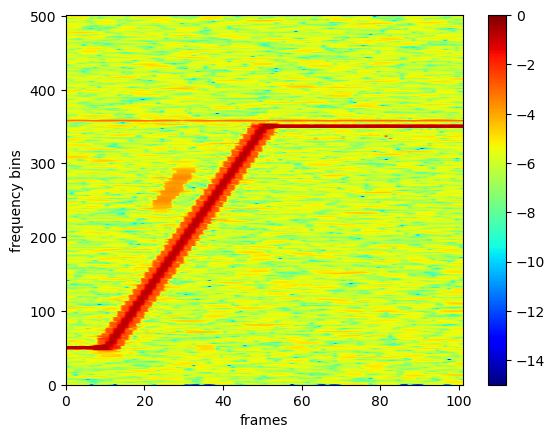

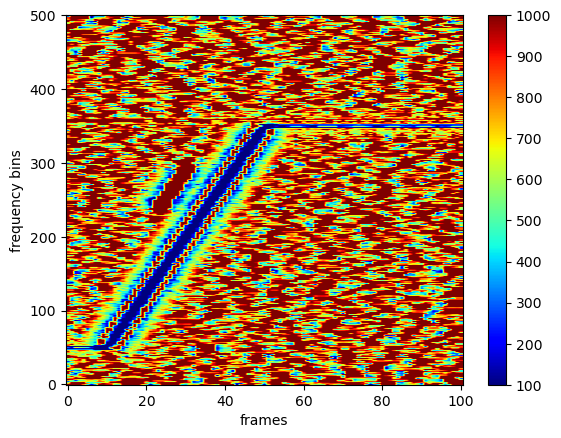

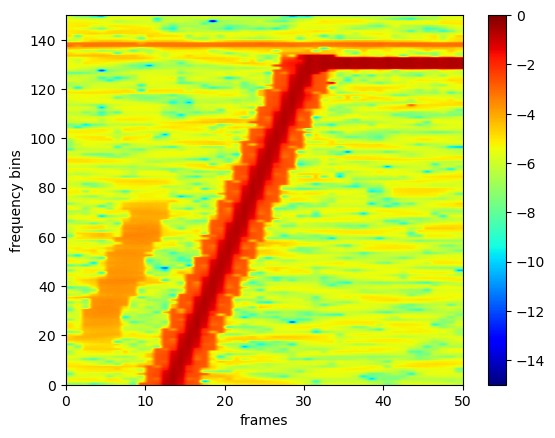

In [ ]:
dstft = DSTFT(
    x,
    win_length=win_length,
    support=support,
    stride=stride,
    win_requires_grad=True,
    stride_requires_grad=False,
    win_p='tf',
    win_min=win_min,
)
params = [{'params': dstft.win_length, 'lr': 100}]
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=opt, mode='min', factor=0.1, patience=patience, verbose=True
)

for epoch in range(epochs):
    opt.zero_grad()
    spec, stft = dstft(x)
    err = entropy_loss(spec)
    err.backward()
    opt.step()
    sch.step(err)

    if torch.isnan(spec).any():
        print(epoch, 'nan')
        break

    if opt.param_groups[0]['lr'] < threshold:
        break

print(epoch)
dstft.print(spec, x, bar=True, wins=False, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['$\\theta_{tf}$'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['$\\theta_{tf}$'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['$\\theta_{tf}$'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['$\\theta_{tf}$'] = entropy_loss(spec).detach().cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

Epoch 00254: reducing learning rate of group 0 to 1.0000e+01.
Epoch 00369: reducing learning rate of group 0 to 1.0000e+00.
Epoch 00501: reducing learning rate of group 0 to 1.0000e-01.
500


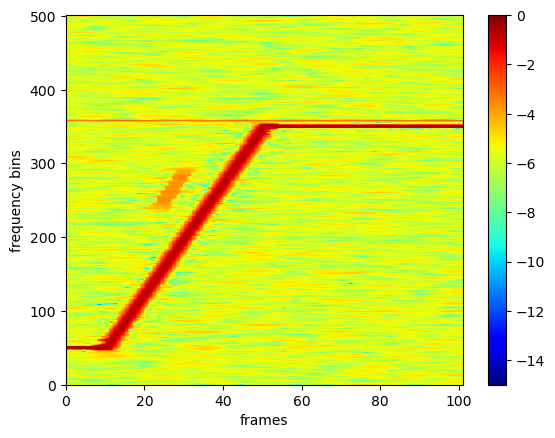

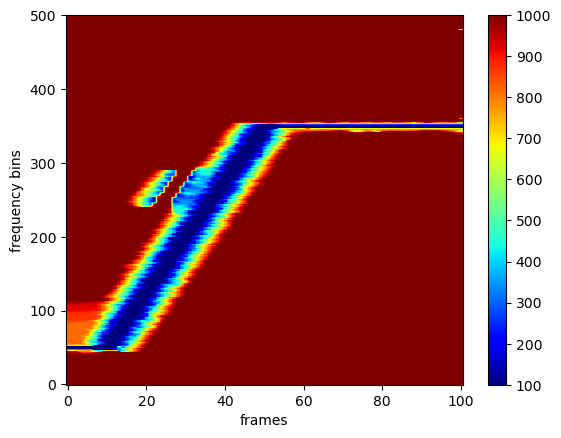

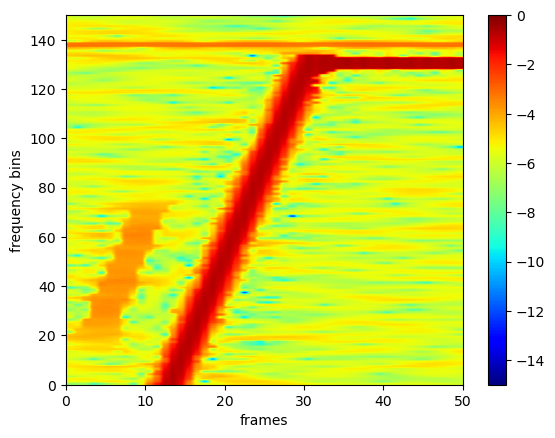

In [ ]:
dstft = DSTFT(
    x,
    win_length=win_length,
    support=support,
    stride=stride,
    win_requires_grad=True,
    stride_requires_grad=False,
    win_p='tf',
    win_min=win_min,
)
params = [{'params': dstft.win_length, 'lr': lr}]
opt = torch.optim.Adam(params)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=opt, mode='min', factor=0.1, patience=patience, verbose=True
)

for epoch in range(epochs):
    opt.zero_grad()
    spec, stft = dstft(x)
    err = (
        entropy_loss(spec)
        + 0.004
        * (
            dstft.actual_win_length.diff(dim=0)[:, :-1].pow(2)
            + dstft.actual_win_length.diff(dim=1)[:-1].pow(2)
            + torch.finfo(x.dtype).eps
        )
        .sqrt()
        .mean()
    )
    err.backward()
    opt.step()
    sch.step(err)

    if opt.param_groups[0]['lr'] < threshold:
        break

print(epoch)
dstft.print(spec, x, bar=True, wins=False, vmin=vmin, vmax=vmax)
dstft.print(
    spec[:, 220:370, 20:70],
    x,
    bar=True,
    wins=False,
    weights=False,
    vmin=vmin,
    vmax=vmax,
)

with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
specs['$\\tilde{\\theta}_{tf}$'] = spec.detach().cpu()
with open('../tmp/2_specs.pkl', 'wb') as file:
    pickle.dump(specs, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
stfts['$\\tilde{\\theta}_{tf}$'] = stft.detach().cpu()
with open('../tmp/2_stfts.pkl', 'wb') as file:
    pickle.dump(stfts, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
wins['$\\tilde{\\theta}_{tf}$'] = dstft.actual_win_length.mean().detach().cpu()
with open('../tmp/2_wins.pkl', 'wb') as file:
    pickle.dump(wins, file, pickle.HIGHEST_PROTOCOL)

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
losses['$\\tilde{\\theta}_{tf}$'] = entropy_loss(spec).detach().cpu().item()
with open('../tmp/2_losses.pkl', 'wb') as file:
    pickle.dump(losses, file, pickle.HIGHEST_PROTOCOL)

Synchrosqueezing

In [ ]:
with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
with open('../tmp/2_ss.pkl', 'rb') as file:
    ss = pickle.load(file)
with open('../tmp/2_losses2.pkl', 'rb') as file:
    losses2 = pickle.load(file)

for key, stft in stfts.items():
    z = fast_sst(stft[0], 10, stft.shape[-2], stft.shape[-1], 0.05, device)
    ss[key] = z
    losses2[key] = entropy_loss(z).detach().cpu().item()
    # dstft.print(stft.abs(), x, bar=True, weights=False, wins=False, vmin=vmin, vmax=vmax)

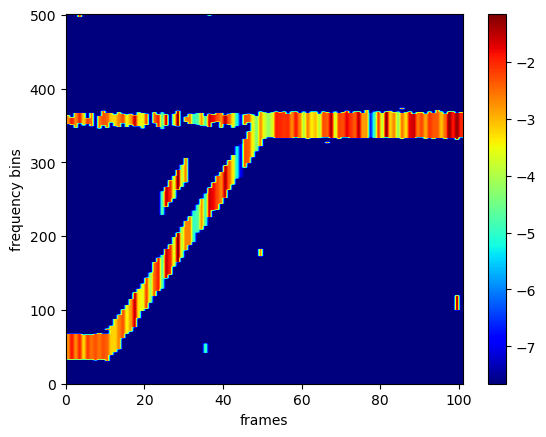

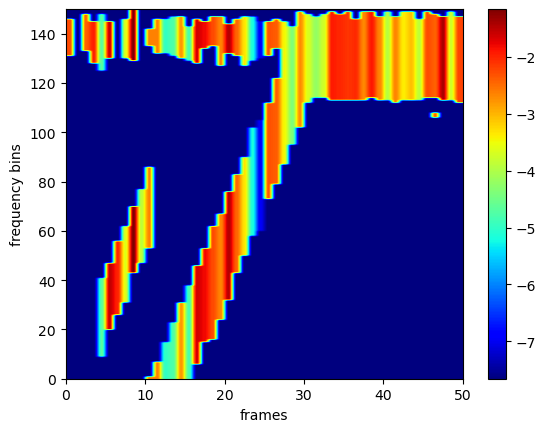

In [ ]:
with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
with open('../tmp/2_ss.pkl', 'rb') as file:
    ss = pickle.load(file)
with open('../tmp/2_losses2.pkl', 'rb') as file:
    losses2 = pickle.load(file)

z = fast_sst(
    stfts['100'][0],
    10,
    stfts['100'].shape[-2],
    stfts['100'].shape[-1],
    0.07,
    device,
)
ss['100'] = z
losses2['100'] = entropy_loss(z).detach().cpu().item()

dstft.print(z[None, ...], x, bar=True, wins=False, weights=False)
dstft.print(z[None, 220:370, 20:70], x, bar=True, wins=False, weights=False)

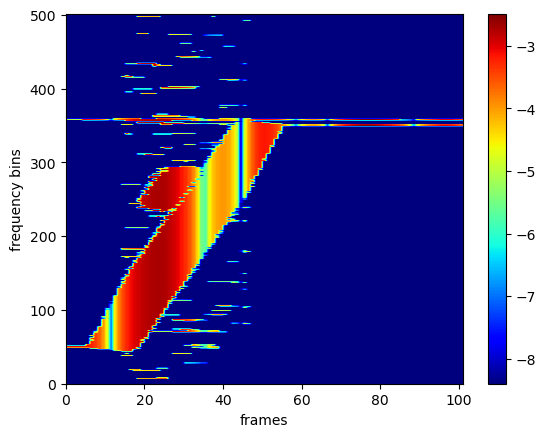

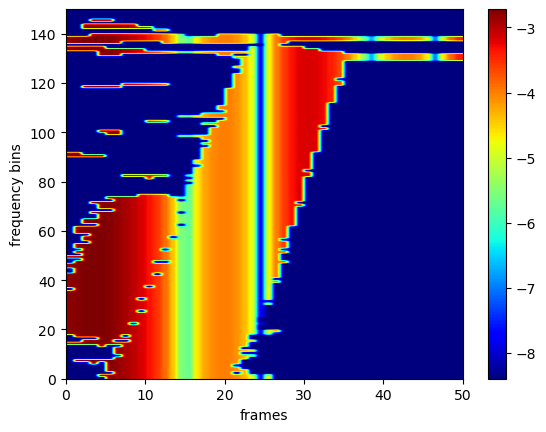

In [ ]:
with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
with open('../tmp/2_ss.pkl', 'rb') as file:
    ss = pickle.load(file)
with open('../tmp/2_losses2.pkl', 'rb') as file:
    losses2 = pickle.load(file)

z = fast_sst(
    stfts['1000'][0],
    10,
    stfts['100'].shape[-2],
    stfts['100'].shape[-1],
    0.08,
    device,
)
ss['1000'] = z
losses2['1000'] = entropy_loss(z).detach().cpu().item()

dstft.print(z[None, ...], x, bar=True, wins=False, weights=False)
dstft.print(z[None, 220:370, 20:70], x, bar=True, wins=False, weights=False)

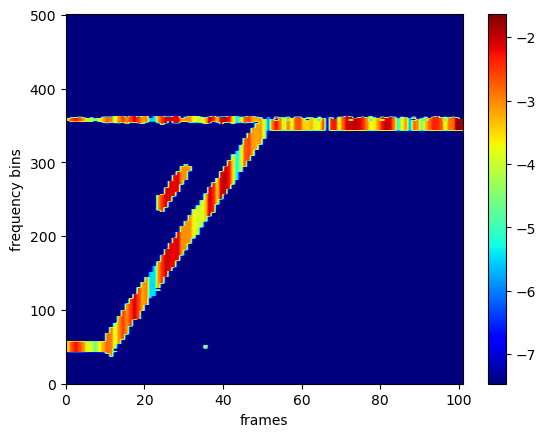

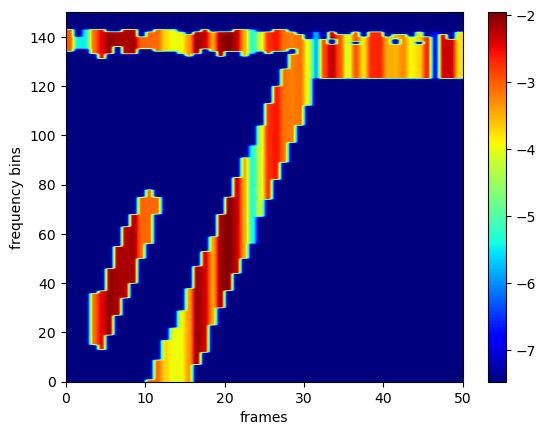

In [ ]:
with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
with open('../tmp/2_ss.pkl', 'rb') as file:
    ss = pickle.load(file)
with open('../tmp/2_losses2.pkl', 'rb') as file:
    losses2 = pickle.load(file)

z = fast_sst(
    stfts['$\\theta$'][0],
    10,
    stfts['100'].shape[-2],
    stfts['100'].shape[-1],
    0.07,
    device,
)
ss['$\\theta$'] = z
losses2['$\\theta$'] = entropy_loss(z).detach().cpu().item()

dstft.print(z[None, ...], x, bar=True, wins=False, weights=False)
dstft.print(z[None, 220:370, 20:70], x, bar=True, wins=False, weights=False)

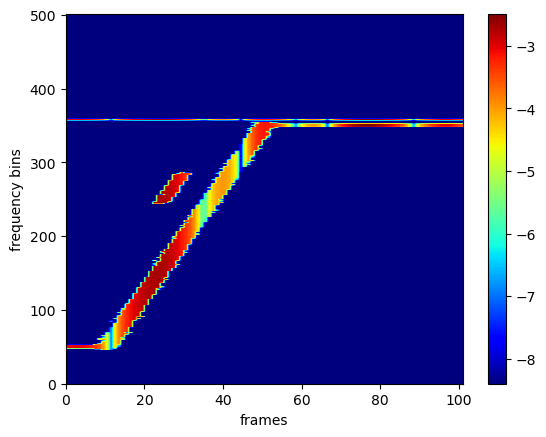

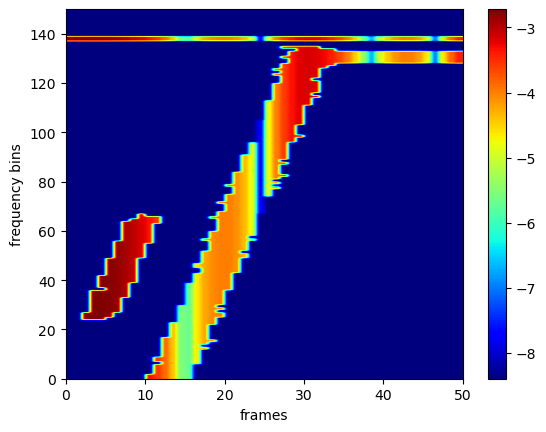

In [ ]:
with open('../tmp/2_stfts.pkl', 'rb') as file:
    stfts = pickle.load(file)
with open('../tmp/2_ss.pkl', 'rb') as file:
    ss = pickle.load(file)
with open('../tmp/2_losses2.pkl', 'rb') as file:
    losses2 = pickle.load(file)

z = fast_sst(
    stfts['$\\tilde{\\theta}_{tf}$'][0],
    10,
    stfts['100'].shape[-2],
    stfts['100'].shape[-1],
    0.04,
    device,
)
ss['$\\tilde{\\theta}_{tf}$'] = z
losses2['$\\tilde{\\theta}_{tf}$'] = entropy_loss(z).detach().cpu().item()

dstft.print(z[None, ...], x, bar=True, wins=False, weights=False)
dstft.print(z[None, 220:370, 20:70], x, bar=True, wins=False, weights=False)

In [ ]:
with open('../tmp/2_ss.pkl', 'wb') as file:
    pickle.dump(ss, file, pickle.HIGHEST_PROTOCOL)
with open('../tmp/2_losses2.pkl', 'wb') as file:
    pickle.dump(losses2, file, pickle.HIGHEST_PROTOCOL)

Loss

236


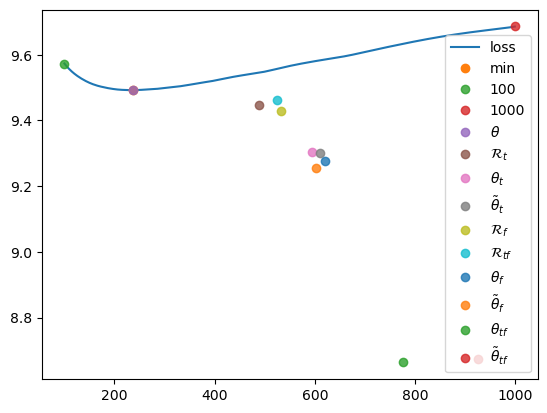

In [ ]:
loss_function = []
min_err = 100
min_win = 0

for win_length in range(100, 1000, 1):
    dstft = FDSTFT(
        x,
        win_length=win_length,
        support=support,
        stride=stride,
        win_requires_grad=False,
        stride_requires_grad=False,
        win_p=None,
        stride_p=None,
    )
    spec, stft = dstft(x)
    err = entropy_loss(spec)

    if err < min_err:
        min_err = err
        min_win = win_length
    loss_function.append(err.cpu())

print(min_win)
plt.plot(range(100, 1000, 1), loss_function, label='loss')
plt.plot(min_win, min_err.cpu(), 'o', label='min')

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
for key, loss in losses.items():
    plt.plot(wins[key], loss, 'o', alpha=0.8, label=key)
plt.legend()
plt.show()

236


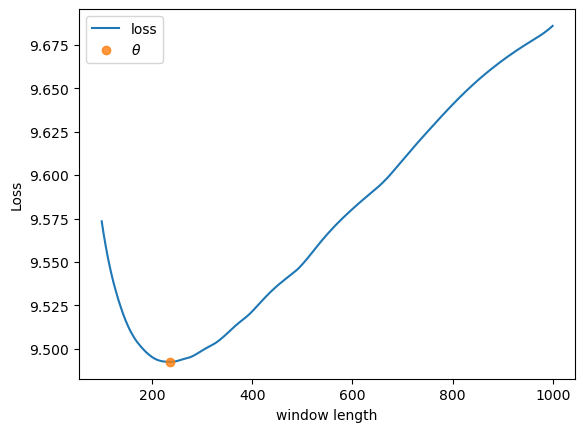

In [ ]:
loss_function = []
min_err = 100
min_win = 0

for win_length in range(100, 1000, 1):
    dstft = FDSTFT(
        x,
        win_length=win_length,
        support=support,
        stride=stride,
        win_requires_grad=False,
        stride_requires_grad=False,
        win_p=None,
        stride_p=None,
    )
    spec, stft = dstft(x)
    err = entropy_loss(spec)

    if err < min_err:
        min_err = err
        min_win = win_length
    loss_function.append(err.cpu())

print(min_win)
plt.plot(range(100, 1000, 1), loss_function, label='loss')

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
plt.plot(
    wins['$\\theta$'], losses['$\\theta$'], 'o', alpha=0.8, label='$\\theta$'
)
plt.xlabel('window length')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: '$\tilde{\theta}_{tf}$'

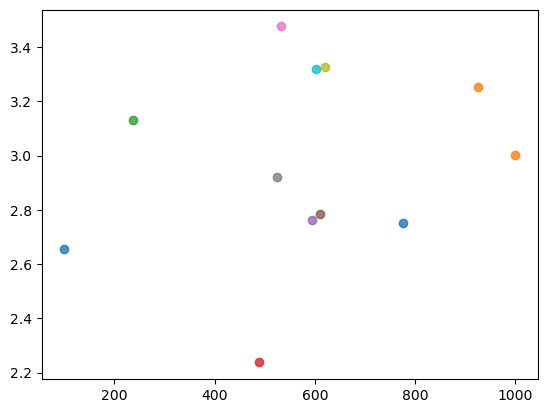

In [ ]:
with open('../tmp/2_losses2.pkl', 'rb') as file:
    losses2 = pickle.load(file)
with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
for key, loss in losses2.items():
    plt.plot(wins[key], loss, 'o', alpha=0.8, label=f'ss_{key}')
plt.legend()
plt.show()

236


KeyError: '$\tilde{\theta}_{tf}$'

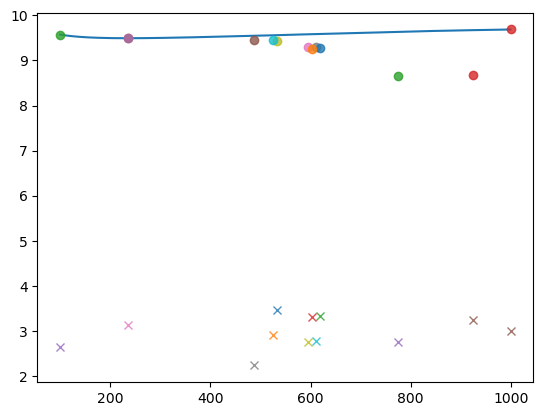

In [ ]:
loss_function = []
min_err = 100
min_win = 0

for win_length in range(100, 1000, 1):
    dstft = FDSTFT(
        x,
        win_length=win_length,
        support=support,
        stride=stride,
        win_requires_grad=False,
        stride_requires_grad=False,
        win_p=None,
        stride_p=None,
    )
    spec, stft = dstft(x)
    err = entropy_loss(spec)

    if err < min_err:
        min_err = err
        min_win = win_length
    loss_function.append(err.cpu())

print(min_win)
plt.plot(range(100, 1000, 1), loss_function, label='loss')
plt.plot(min_win, min_err.cpu(), 'o', label='min')

with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
with open('../tmp/2_losses2.pkl', 'rb') as file:
    losses2 = pickle.load(file)
with open('../tmp/2_wins.pkl', 'rb') as file:
    wins = pickle.load(file)
for key, loss in losses.items():
    plt.plot(wins[key], loss, 'o', alpha=0.8, label=key)
for key, loss in losses2.items():
    plt.plot(wins[key], loss, 'x', alpha=0.8, label=f'ss_{key}')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

['100', '1000', '$\\theta$', '$\\mathcal{R}_t$', '$\\theta_t$', '$\\tilde{\\theta}_t$', '$\\mathcal{R}_f$', '$\\mathcal{R}_{tf}$', '$\\theta_f$', '$\\tilde{\\theta}_f$', '$\\theta_{tf}$', '$\\tilde{\\theta}_{tf}$']
[9.573384284973145, 9.68613338470459, 9.492437362670898, 9.448513984680176, 9.304377555847168, 9.301263809204102, 9.427783966064453, 9.463302612304688, 9.275325775146484, 9.254345893859863, 8.663346290588379, 8.674123764038086]


(8.0, 10.170440053939819)

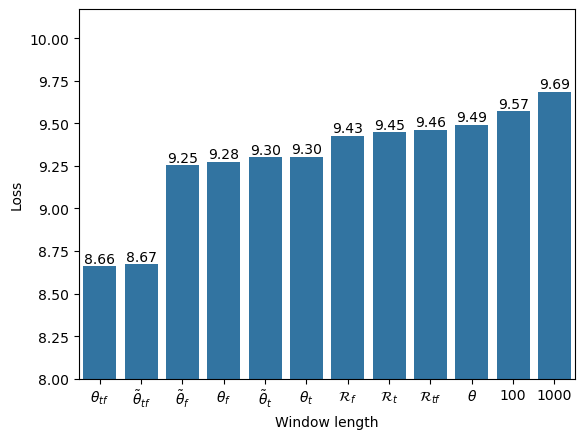

In [ ]:
with open('../tmp/2_losses.pkl', 'rb') as file:
    losses = pickle.load(file)
keys = list(losses.keys())
values = list(losses.values())
print(keys)
print(values)
df = pd.DataFrame({'Window length': keys, 'Loss': values})

df.sort_values(by='Loss', axis=0, inplace=True)
df.head()
ax = sns.barplot(y='Loss', data=df, x='Window length')
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f')
ax.set_ylim(8)

PLot SS

100


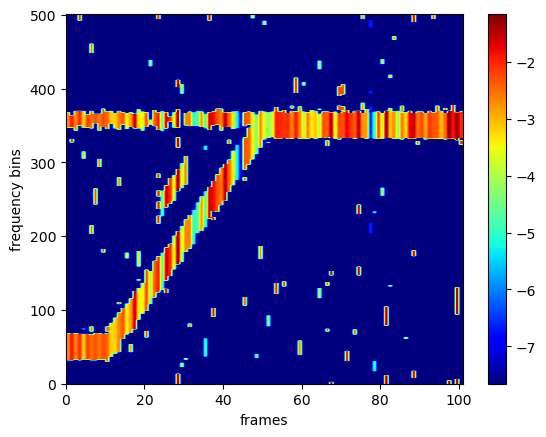

1000


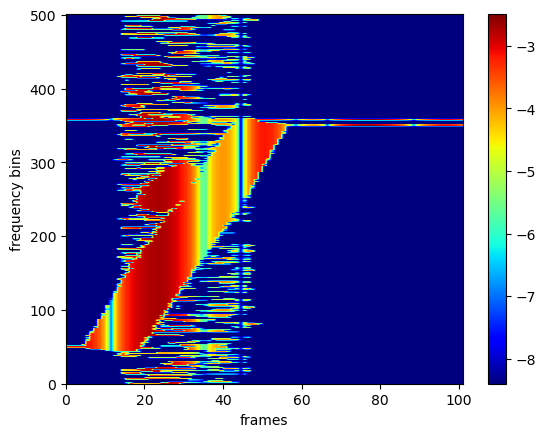

$\theta$


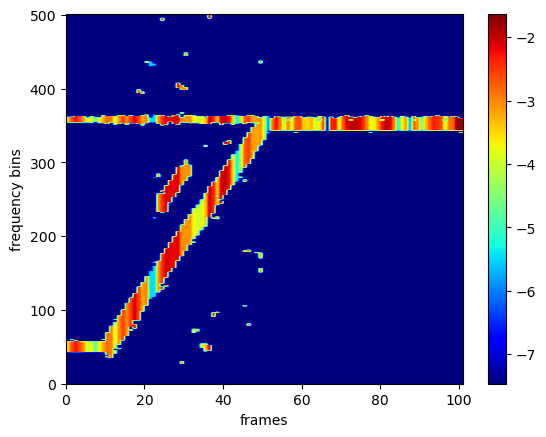

$\mathcal{R}_t$


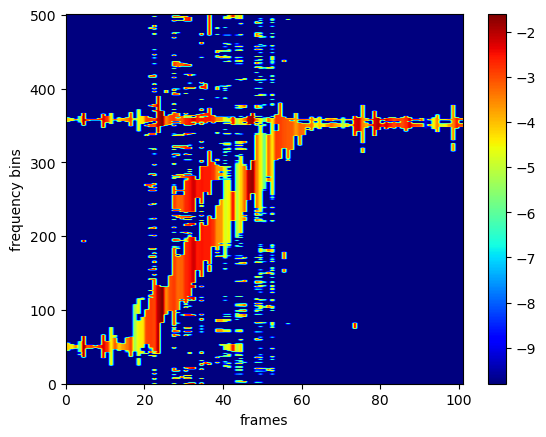

$\theta_t$


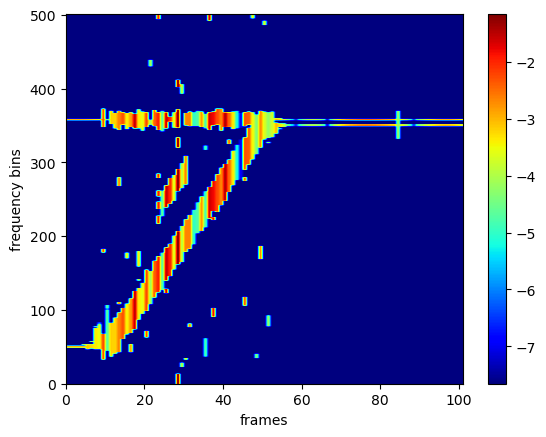

$\tilde{\theta}_t$


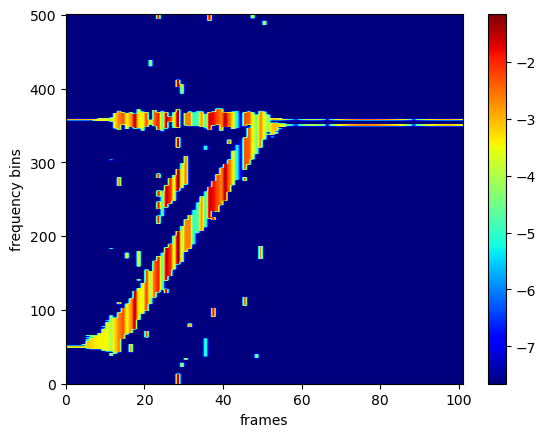

$\mathcal{R}_f$


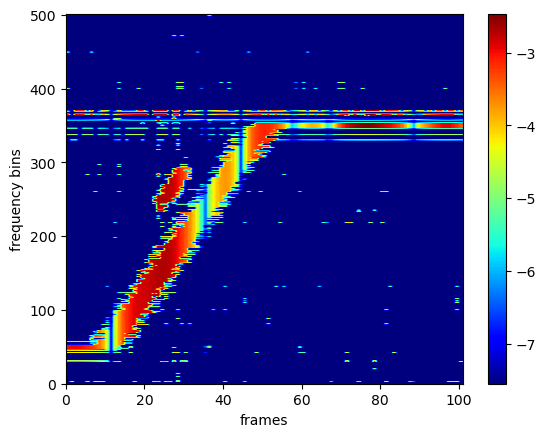

$\mathcal{R}_{tf}$


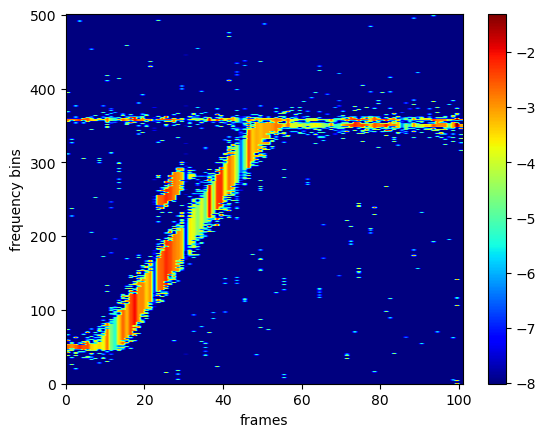

$\theta_f$


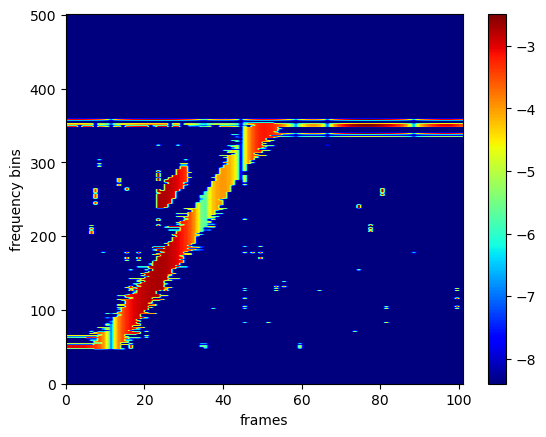

$\tilde{\theta}_f$


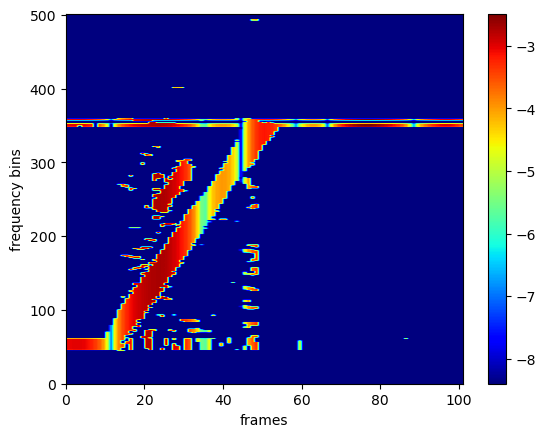

$\theta_{tf}$


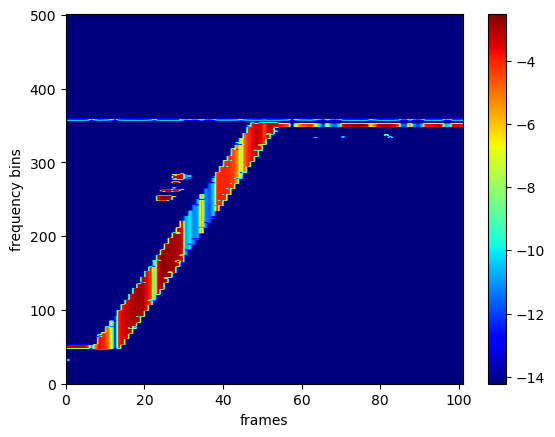

$\tilde{\theta}_{tf}$


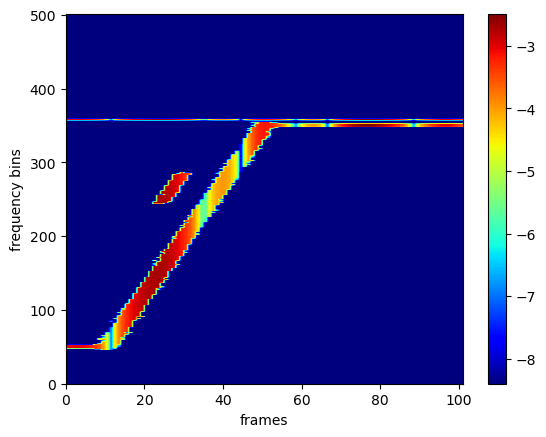

$	ilde{	heta}_{tf}$


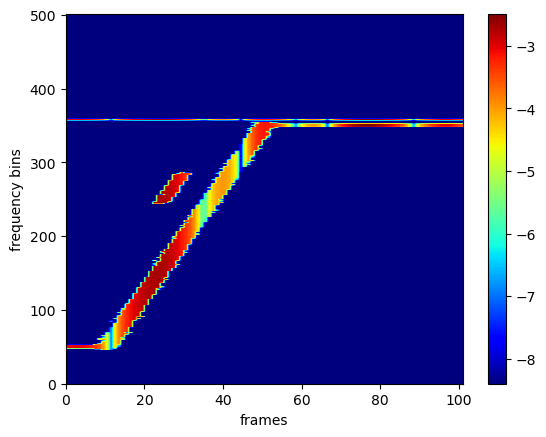

$	heta$


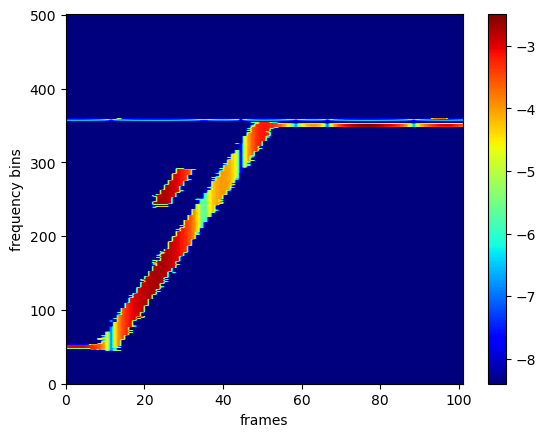

In [ ]:
with open('../tmp/2_ss.pkl', 'rb') as file:
    ss = pickle.load(file)
for key, z in ss.items():
    print(key)
    dstft.print(z[None, ...], x, bar=True, wins=False, weights=False)

100


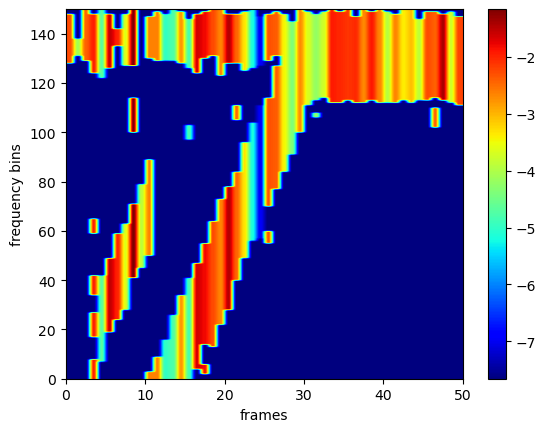

1000


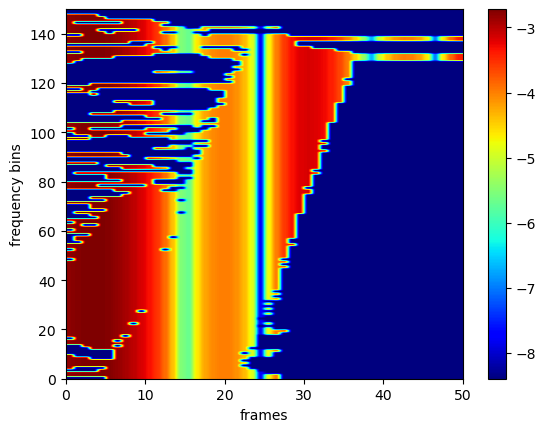

$\theta$


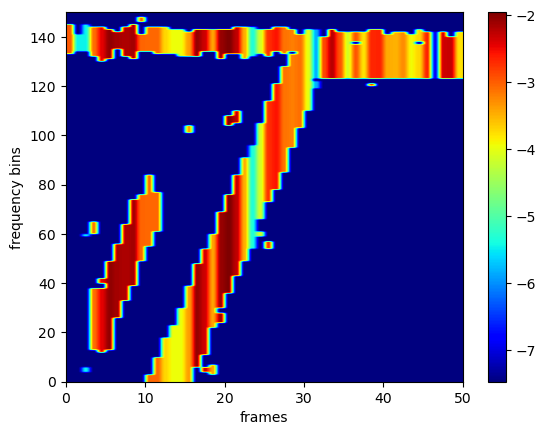

$\mathcal{R}_t$


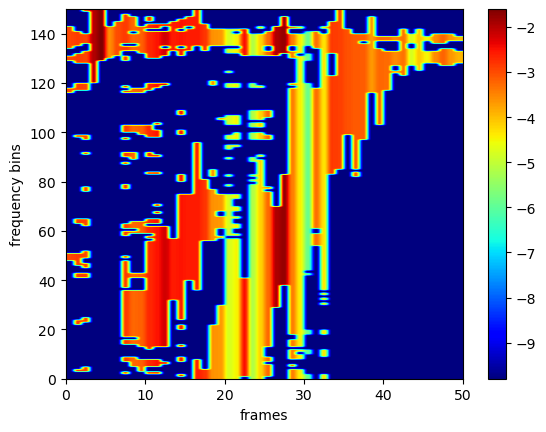

$\theta_t$


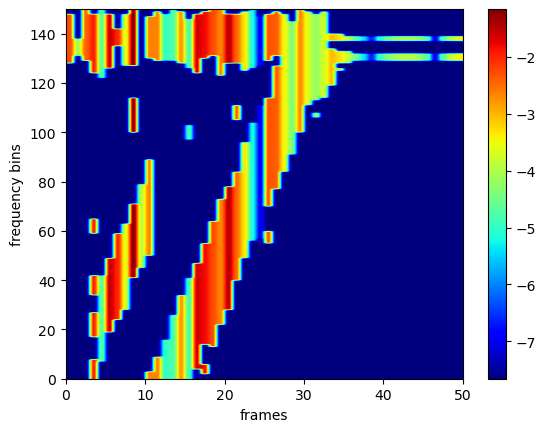

$\tilde{\theta}_t$


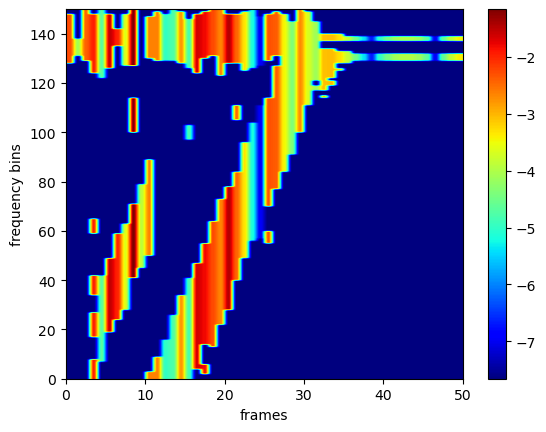

$\mathcal{R}_f$


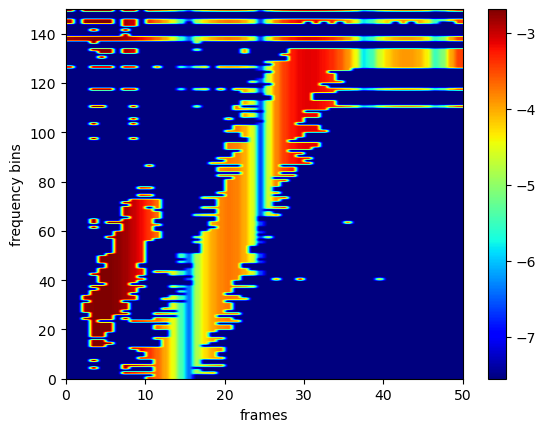

$\mathcal{R}_{tf}$


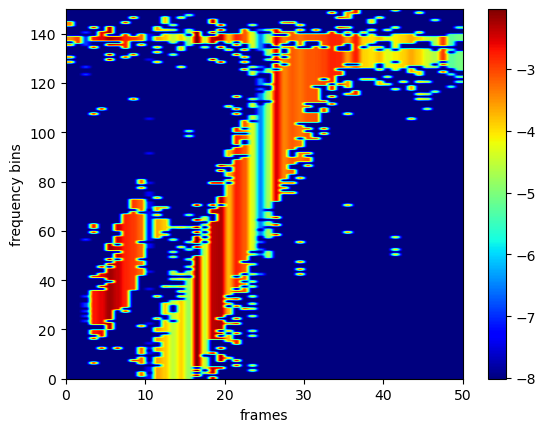

$\theta_f$


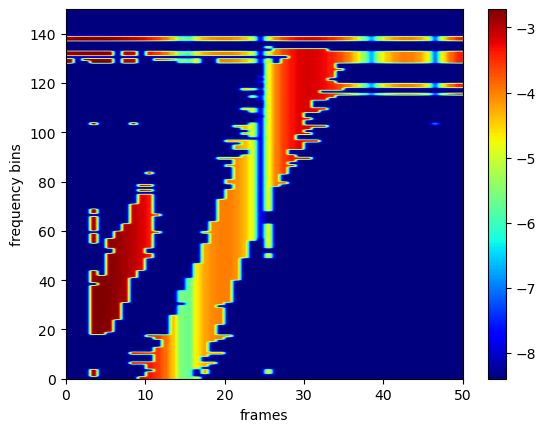

$\tilde{\theta}_f$


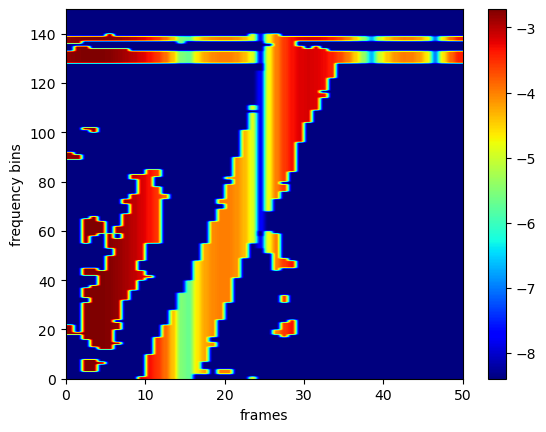

$\theta_{tf}$


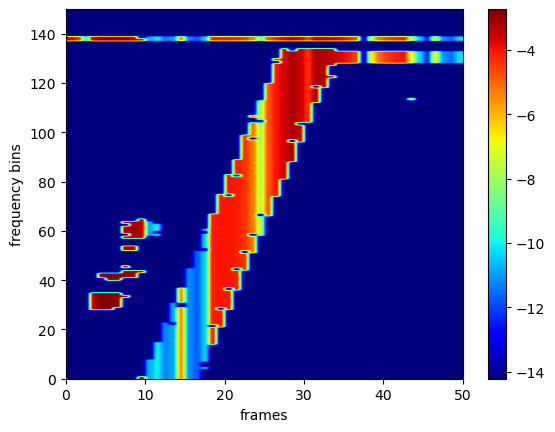

$\tilde{\theta}_{tf}$


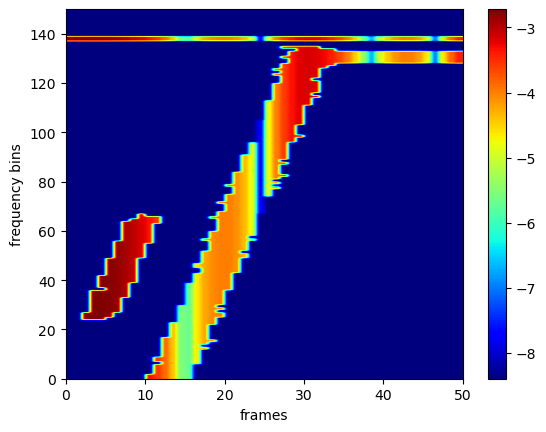

$	ilde{	heta}_{tf}$


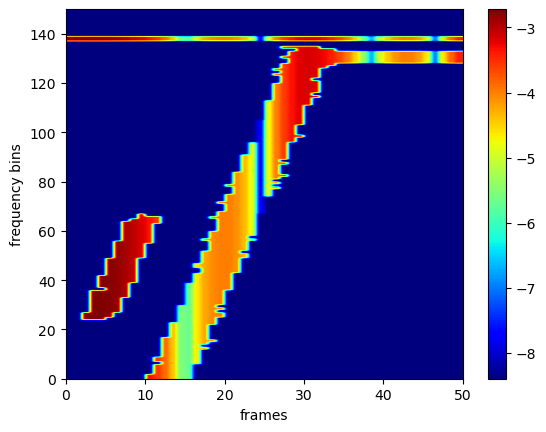

$	heta$


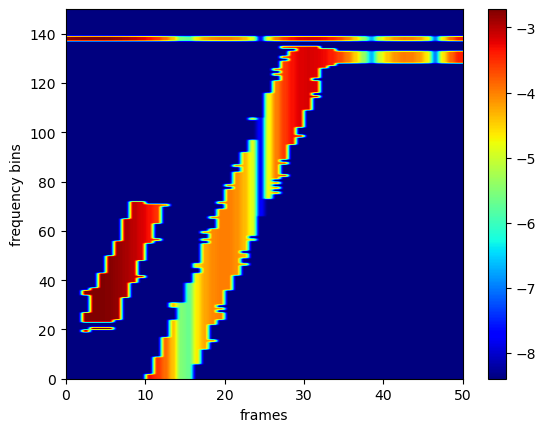

In [ ]:
with open('../tmp/2_ss.pkl', 'rb') as file:
    ss = pickle.load(file)
for key, z in ss.items():
    print(key)
    dstft.print(
        z[None, 220:370, 20:70], x, bar=True, wins=False, weights=False
    )

$\hat{f}$

In [ ]:
with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
with open('../tmp/2_f_hats.pkl', 'rb') as file:
    f_hats = pickle.load(file)
for key, spec in specs.items():
    print(key)
    f_hat, out = frequency_tracking(
        y=x,
        fs=1,
        spec=spec[0].to(device),
        fmin=0,
        fmax=0.4,
        alpha=10,
        orders=[],
    )
    f_hats[key] = out.cpu()
    # f_hat = torch.nn.functional.interpolate((out*1/2/spec.shape[0])[None, None, None, ...], size=x[0].shape[-1], mode='bicubic').squeeze()[0]
    # plt.figure()
    # plt.title('Spectrogram')
    # ax = plt.subplot()
    # im = ax.imshow(spec[0].detach().cpu().log(), aspect='auto', origin='lower', cmap='viridis', extent=[0,spec.shape[-1], 0, spec.shape[-2]])
    # plt.ylabel('frequencies')
    # plt.xlabel('frames')
    # plt.colorbar(im, ax=ax)
    # plt.plot(out.detach().cpu(), '--r', linewidth=2)
    # plt.show()

with open('../tmp/2_f_hats.pkl', 'wb') as file:
    pickle.dump(f_hats, file, pickle.HIGHEST_PROTOCOL)

100


KeyboardInterrupt: 

In [ ]:
with open('../tmp/2_ss.pkl', 'rb') as file:
    ss = pickle.load(file)
with open('../tmp/2_f_hats2.pkl', 'rb') as file:
    f_hats = pickle.load(file)
for key, z in ss.items():
    print(key)
    f_hat, out = frequency_tracking(
        y=x, fs=1, spec=z.to(device), fmin=0, fmax=0.4, alpha=100, orders=[]
    )
    f_hats[key] = out.cpu()
    # f_hat = torch.nn.functional.interpolate((out*1/2/spec.shape[0])[None, None, None, ...], size=x[0].shape[-1], mode='bicubic').squeeze()[0]
    # plt.figure()
    # plt.title('Spectrogram')# specs = {}
    # ax = plt.subplot()
    # im = ax.imshow(spec[0].detach().cpu().log(), aspect='auto', origin='lower', cmap='viridis', extent=[0,spec.shape[-1], 0, spec.shape[-2]])
    # plt.ylabel('frequencies')
    # plt.xlabel('frames')
    # plt.colorbar(im, ax=ax)
    # plt.plot(out.detach().cpu(), '--r', linewidth=2)
    # plt.show()

with open('../tmp/2_f_hats2.pkl', 'wb') as file:
    pickle.dump(f_hats, file, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('../tmp/2_specs.pkl', 'rb') as file:
    specs = pickle.load(file)
with open('../tmp/2_f_hats.pkl', 'rb') as file:
    f_hats = pickle.load(file)

for key, out in f_hats.items():
    print(key)
    plt.figure()
    plt.title(f'Spectrogram {key}')
    ax = plt.subplot()
    im = ax.imshow(
        specs[key][0].log(),
        aspect='auto',
        origin='lower',
        cmap='viridis',
        extent=[0, specs[key].shape[-1], 0, specs[key].shape[-2]],
    )
    plt.ylabel('frequencies')
    plt.xlabel('frames')
    plt.colorbar(im, ax=ax)
    plt.plot(out, 'r--', linewidth=2)
    plt.show()

In [ ]:
with open('../tmp/2_ss.pkl', 'rb') as file:
    ss = pickle.load(file)
with open('../tmp/2_f_hats2.pkl', 'rb') as file:
    f_hats = pickle.load(file)

for key, out in f_hats.items():
    print(key)
    plt.figure()
    plt.title(f'Synchrosqueeze {key}')
    ax = plt.subplot()
    im = ax.imshow(
        specs[key][0].log(),
        aspect='auto',
        origin='lower',
        cmap='viridis',
        extent=[0, specs[key].shape[-1], 0, specs[key].shape[-2]],
    )
    plt.ylabel('frequencies')
    plt.xlabel('frames')
    plt.colorbar(im, ax=ax)
    plt.plot(out, 'r--', linewidth=2)
    plt.show()

In [ ]:
with open('../tmp/2_f_hats.pkl', 'rb') as file:
    f_hats = pickle.load(file)
for key, out in f_hats.items():
    plt.plot(out, label=key)
plt.legend()

plt.figure()
with open('../tmp/2_f_hats2.pkl', 'rb') as file:
    f_hats = pickle.load(file)
for key, out in f_hats.items():
    plt.plot(out, label=key)
plt.legend()